In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Tissue_Comp.csv")

In [ ]:
df.head()

,Gene,X5EGGE,X5EQMM,X5GICA,X5N9D6,X5P9GB,X5N9ES,X5P9GS,X5N9E1
0,DDX11L1,0,0,0,1,1,0,0,0
1,WASH7P,67,98,66,104,111,84,133,300
2,MIR6859-1,0,0,0,0,0,0,0,0
3,MIR1302-2HG,0,1,0,0,0,0,0,0
4,FAM138A,1,0,0,1,2,1,0,0


In [ ]:
df = df.T

In [ ]:
df.columns = df.loc["Gene"]
df = df.drop("Gene",axis=0)

In [ ]:
df.head()

Gene,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
X5EGGE,0,67,0,0,1,2,3,2,2,0,...,2251665,1,85,4,206772,48012,19,939636,0,7
X5EQMM,0,98,0,1,0,2,3,1,5,0,...,6094947,5,2,1,851116,205006,18,3111628,4,1
X5GICA,0,66,0,0,0,0,0,0,2,34,...,773695,1,0,1,360866,224252,144,426858,8,1
X5N9D6,1,104,0,0,1,0,0,0,3,18,...,720979,1,0,0,112167,32272,13,207945,3,3
X5P9GB,1,111,0,0,2,0,0,2,9,11,...,863863,4,0,2,196338,73401,38,449434,2,2


# 1. Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler(with_std=False)
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.index = df.index
scaled_df.columns = df.columns

In [ ]:
scaled_df.head()

Gene,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
X5EGGE,-0.25,-53.375,0.0,-0.125,0.375,1.375,2.0,1.0,-1.375,-14.375,...,661055.0,-1.0,73.75,2.0,-48154.25,-37481.75,-20.125,169178.875,-3.25,4.625
X5EQMM,-0.25,-22.375,0.0,0.875,-0.625,1.375,2.0,0.0,1.625,-14.375,...,4504337.0,3.0,-9.25,-1.0,596189.75,119512.25,-21.125,2341170.875,0.75,-1.375
X5GICA,-0.25,-54.375,0.0,-0.125,-0.625,-0.625,-1.0,-1.0,-1.375,19.625,...,-816915.0,-1.0,-11.25,-1.0,105939.75,138758.25,104.875,-343599.125,4.75,-1.375
X5N9D6,0.75,-16.375,0.0,-0.125,0.375,-0.625,-1.0,-1.0,-0.375,3.625,...,-869631.0,-1.0,-11.25,-2.0,-142759.25,-53221.75,-26.125,-562512.125,-0.25,0.625
X5P9GB,0.75,-9.375,0.0,-0.125,1.375,-0.625,-1.0,1.0,5.625,-3.375,...,-726747.0,2.0,-11.25,0.0,-58588.25,-12092.75,-1.125,-321023.125,-1.25,-0.375


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [ ]:
variance_explained = pd.DataFrame(100*pca.explained_variance_ratio_)
variance_explained.index = ["PC "+str(x) for x in range(1,9)]
variance_explained.columns = ["Explained variance (%)"]

In [ ]:
variance_explained

,Explained variance (%)
PC 1,5.349336e+01
PC 2,3.681674e+01
PC 3,4.307712e+00
PC 4,2.869848e+00
PC 5,1.887719e+00
PC 6,3.864584e-01
PC 7,2.381624e-01
PC 8,4.431429e-28


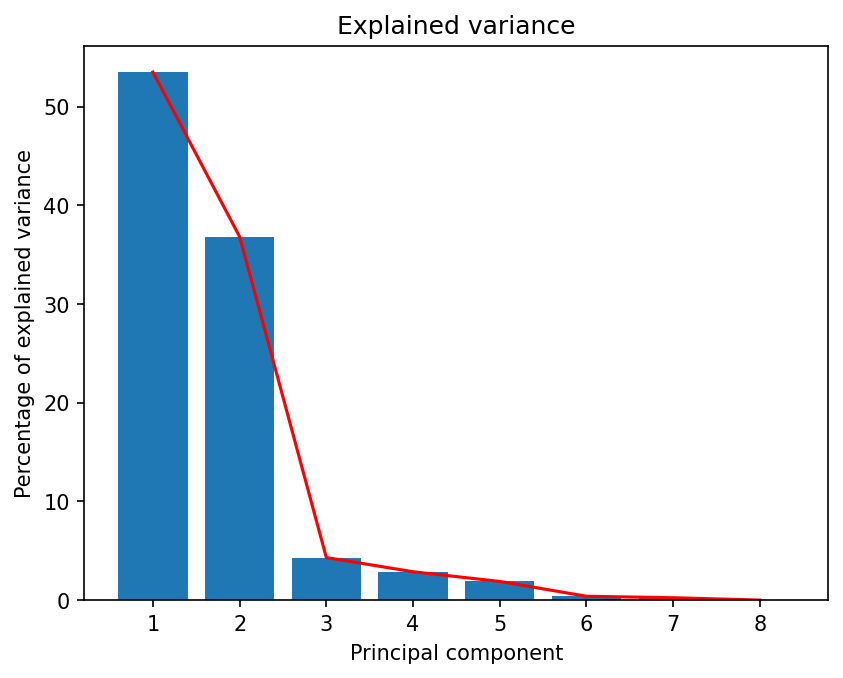

In [ ]:
plt.figure(dpi=150)
plt.bar(x=range(1,9),height=100*pca.explained_variance_ratio_)
plt.plot(range(1,9),100*pca.explained_variance_ratio_,c="r")
plt.title("Explained variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component");

In [ ]:
dim_red_df = pd.DataFrame(pca.fit_transform(scaled_df))
dim_red_df.index = df.index
dim_red_df.columns = ["PC "+str(x) for x in range(1,9)]

In [ ]:
dim_red_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
X5EGGE,2.306031e+06,-5.346824e+05,5.920857e+04,-1.710470e+06,1.140098e+06,58305.526502,3142.841742,-1.074824e-08
X5EQMM,7.675440e+06,4.507222e+06,3.641137e+04,6.252727e+05,-2.476613e+05,-27791.940629,-13249.586735,-1.074824e-08
X5GICA,2.379513e+05,-2.395856e+06,-1.898711e+05,-5.208510e+05,-1.157556e+06,571347.952306,-49961.484970,-1.074824e-08
X5N9D6,6.274295e+04,-2.524083e+06,-1.540821e+05,-4.760239e+05,-8.010810e+05,-661615.521217,150128.578448,-1.074824e-08
X5P9GB,-4.340427e+06,2.637211e+06,2.348838e+06,5.195506e+04,-6.129988e+04,3166.375488,-4379.585093,-1.074824e-08
X5N9ES,-5.312552e+06,4.346680e+06,-1.834670e+06,-2.772918e+04,6.610966e+04,982.641704,4838.686661,-1.074824e-08
X5P9GS,-2.368739e+05,-2.978999e+06,-1.111184e+05,1.186767e+06,6.372517e+05,162110.036050,438134.872659,-1.074824e-08
X5N9E1,-3.923112e+05,-3.057493e+06,-1.547162e+05,8.710791e+05,4.241395e+05,-106505.070205,-528654.322712,-1.074824e-08


In [25]:
tissue_data = pd.read_csv("Gtex_metadata_tissue.csv")

In [ ]:
dim_red_df["Tissue"] = [tissue_data[tissue_data["Gene"]==x[1:]]["Tissue "].iloc[0].strip() for x in df.index]

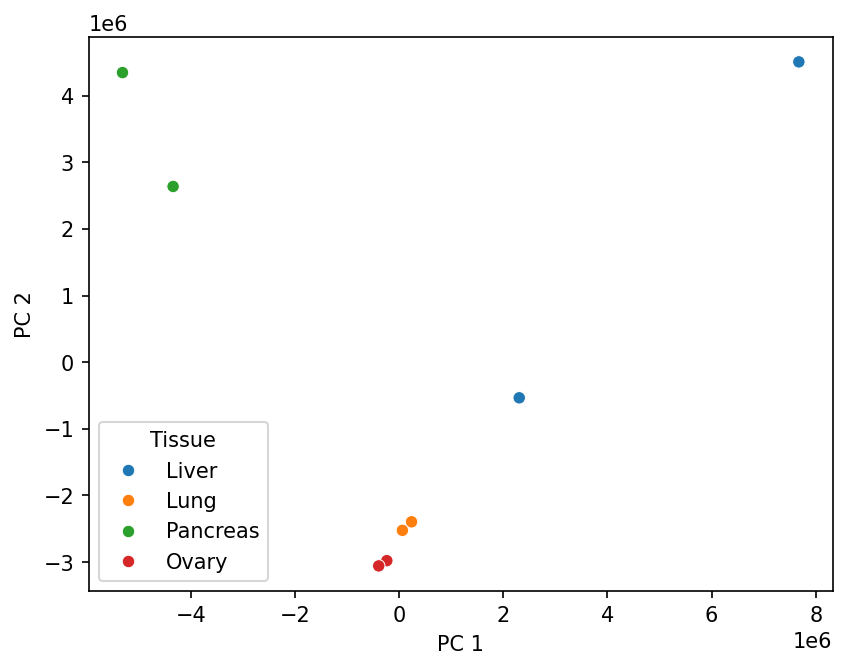

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x=dim_red_df["PC 1"],y=dim_red_df["PC 2"],hue=dim_red_df["Tissue"]);

# 2. Differential Gene Expression Analysis

In [20]:
!pip install pydeseq2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00


In [31]:
tissue_data = pd.read_csv("Gtex_metadata_tissue.csv")
tissue_data["Gene"] = tissue_data["Gene"].apply(lambda x: "X"+x)
tissue_data.set_index("Gene",inplace=True)
tissue_data.columns = ["group"]
tissue_data["group"] = tissue_data["group"].apply(lambda x: x.strip() if x.strip()=="Ovary" else "Other")
tissue_data

,group
Gene,
X5EGGE,Other
X5EQMM,Other
X5GICA,Other
X5N9D6,Other
X5P9GB,Other
X5N9ES,Other
X5P9GS,Ovary
X5N9E1,Ovary


In [23]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [32]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=df,
    metadata=tissue_data,
    design_factors="group",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 80.26 seconds.

Fitting dispersion trend curve...
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:715: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 2.08 seconds.

Fitting MAP dispersions...
... done in 88.49 seconds.

Fitting LFCs...
... done in 63.14 seconds.

Calculating cook's distance...
... done in 0.07 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 17.01 seconds.



Log2 fold change & Wald test p-value: group Ovary vs Other
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                      
DDX11L1      2.498635e-01       -2.104346  3.419249 -0.615441  0.538263   
WASH7P       1.141542e+02        0.182394  0.522668  0.348967  0.727114   
MIR6859-1    0.000000e+00             NaN       NaN       NaN       NaN   
MIR1302-2HG  1.551013e-01       -1.623445  4.573327 -0.354981  0.722604   
FAM138A      8.216970e-01       -3.307811  2.729633 -1.211815  0.225583   
...                   ...             ...       ...       ...       ...   
MT-ND6       9.837640e+04       -3.903374  0.798648 -4.887477  0.000001   
MT-TE        4.328698e+01       -3.688935  1.059592 -3.481467  0.000499   
MT-CYB       1.002076e+06       -3.156490  1.138446 -2.772632  0.005561   
MT-TT        3.695780e+00       -5.611002  2.627131 -2.135791  0.032696   
MT-TP        3.448371e+00       -2.184556

In [33]:
df_temp = stat_res.results_df

In [34]:
# Filter the dataframe
def filter_dataframe(df):
    # Remove rows where pvalue is None
    df_filtered = df.dropna(subset=['pvalue'])
    # Remove rows where pvalue is not less than 0.05
    df_filtered = df_filtered[df_filtered['pvalue'] < 0.05]
    return df_filtered

df_temp_filtered = filter_dataframe(df_temp)
df_temp_filtered.to_csv("result_filtered.csv")

# Categorize genes
df_temp['regulation'] = np.where(df_temp['log2FoldChange'] > 0, 'up', 'down')

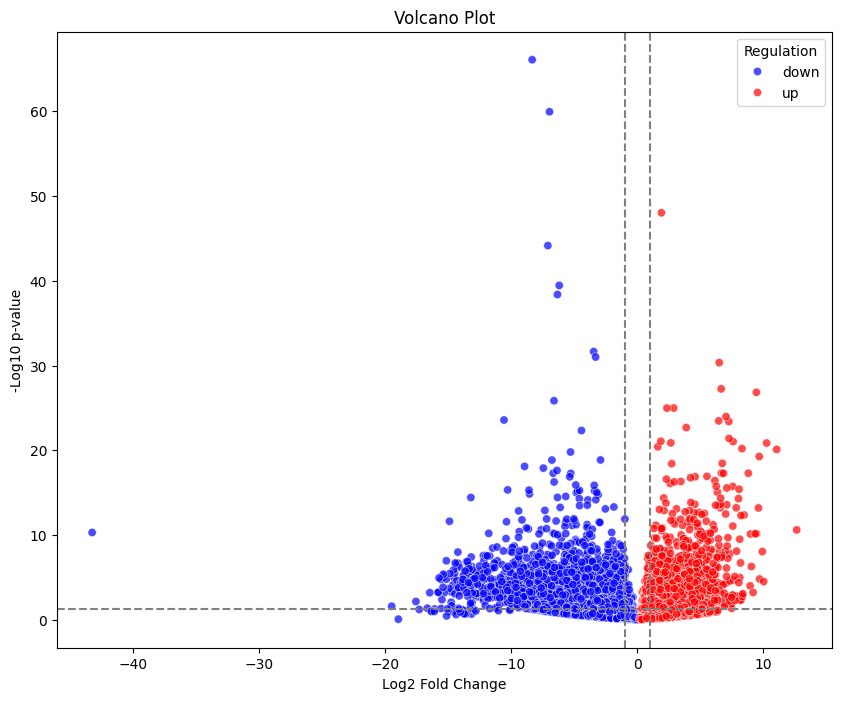

In [35]:
# Volcano plot
def volcano_plot(df):
    plt.figure(figsize=(10, 8))
    # Scatter plot of log2FoldChange vs -log10(pvalue)
    sns.scatterplot(x='log2FoldChange', y=-np.log10(df['pvalue']), data=df, hue='regulation', palette={'up': 'red', 'down': 'blue'}, alpha=0.7)
    plt.title('Volcano Plot')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 p-value')
    plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
    plt.axvline(x=1, color='grey', linestyle='--')
    plt.axvline(x=-1, color='grey', linestyle='--')
    plt.legend(title='Regulation')
    plt.show()

# Create the volcano plot
volcano_plot(df_temp)

# Save upregulated and downregulated genes
upregulated_genes = df_temp[df_temp['regulation'] == 'up']
downregulated_genes = df_temp[df_temp['regulation'] == 'down']

upregulated_genes.to_csv("upregulated_genes.csv")
downregulated_genes.to_csv("downregulated_genes.csv")

In [40]:
df_temp["regulation"].value_counts()

,count
regulation,
down,37237
up,17355
